In [49]:
# 加载包
import sys
import os
from rich.console import Console
sys.path.append(os.getcwd())
sys.path.append(os.path.join(os.getcwd(), 'codes'))
from codes.q_learning import QLearningAgent, QTablePlot
from codes.simple_grid import DrunkenWalkEnv, BROKEN_LEG_PENALTY, SLEEP_DEPRIVATION_PENALTY, REWARD

import gym
from gym import register
cs = Console()
print('gym.__version__ == ', gym.__version__)

gym.__version__ ==  0.21.0


# 一、&#x2708; Quick Train Utils

In [50]:

print(
f"""
BROKEN_LEG_PENALTY={BROKEN_LEG_PENALTY}
SLEEP_DEPRIVATION_PENALTY={SLEEP_DEPRIVATION_PENALTY}
REWARD={REWARD}
"""
)

def main_train(env, env_name, policy_method_list):
    """
    param env: 环境
    param env_name: 环境名称
    param policy_method_list: 探索策略列表
    """
    all_seed(env)
    print(env.nrow, env.ncol)
    final_play_res = []
    for method in policy_method_list:
        # 进行QLearning 学习
        ql_ = QLearningAgent(env, explore_rate=0.01)
        ql_.train(
            epoches=1000, 
            lr_alpha=0.1, 
            gamma=0.9, 
            render=False, 
            policy_method=method,
            epoche_len=500)
        # 绘制迭代的奖励曲线
        ql_.smooth_plot(window_size=50, freq=1, title=f'{method} | ')
        res = ql_.play(render=False, method=method)
        final_play_res.append(res)

        # 绘制QTable
        ploter = QTablePlot(ql_)
        ploter.plot(title=f'{env_name}-{method} | ')
    return final_play_res


def all_seed(env, seed = 1):
    ''' omnipotent seed for RL, attention the position of seed function, you'd better put it just following the env create function
    Args:
        env (_type_): 
        seed (int, optional): _description_. Defaults to 1.
    '''
    import torch
    import numpy as np
    import random
    # print(f"seed = {seed}")
    env.seed(seed) # env config
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed) # config for CPU
    torch.cuda.manual_seed(seed) # config for GPU
    os.environ['PYTHONHASHSEED'] = str(seed) # config for python scripts
    # config for cudnn
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.enabled = False
    print(f'Set env random_seed = {seed}')



BROKEN_LEG_PENALTY=-5
SLEEP_DEPRIVATION_PENALTY=-0.0
REWARD=10



# 二、&#x1F4CC; Env Prepare

In [51]:
gym_env_name = 'FrozenLakeEasy-v0'
register(id=gym_env_name, entry_point="gym.envs.toy_text:FrozenLakeEnv",
        kwargs={"is_slippery": False})
gym_env = gym.make(gym_env_name)


env_dict = {
    'theAlley': DrunkenWalkEnv(map_name='theAlley'),
    'walkInThePark': DrunkenWalkEnv(map_name='walkInThePark'),
    'FrozenLakeEasy-v0': gym_env,
}

C:\Users\29629\AppData\Roaming\Python\Python39\site-packages\gym\envs\registration.py:216: UserWarning: WARN: Overriding environment FrozenLakeEasy-v0
  logger.warn("Overriding environment {}".format(id))


# 三、 &#x1F6B6; Training QTable 


In [52]:
final_res = []

## 3.1 random Policy

------------------------------------------------------------------------------------------
EnvName = theAlley
Set env random_seed = 1
1 13


[ epoch 999 ] |: 100%|██████████| 1000/1000 [00:05<00:00, 189.12it/s, reward=10.000]


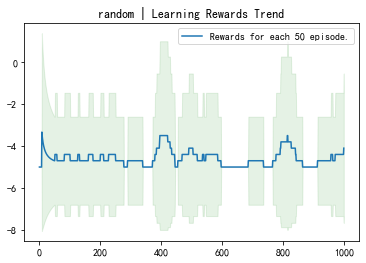

[ TOTAL-STEP: 19 ]: REWORD=-5.0
[ TOTAL-STEP: 73 ]: REWORD=-5.0
[ TOTAL-STEP: 69 ]: REWORD=-5.0
[ TOTAL-STEP: 17 ]: REWORD=-5.0
[ TOTAL-STEP: 111 ]: REWORD=-5.0


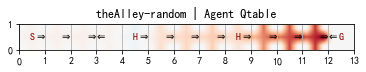

Method: random, MeanStepCnt: 57.800, MeanReward: -5.000]

------------------------------------------------------------------------------------------
EnvName = walkInThePark
Set env random_seed = 1
6 8


[ epoch 999 ] |: 100%|██████████| 1000/1000 [00:06<00:00, 154.08it/s, reward=-5.000]


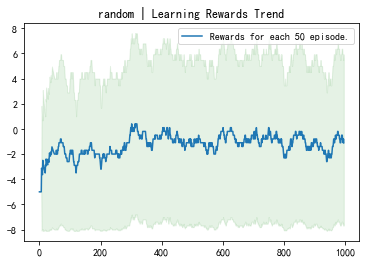

[ TOTAL-STEP: 122 ]: REWORD=10.0
[ TOTAL-STEP: 92 ]: REWORD=-5.0
[ TOTAL-STEP: 146 ]: REWORD=10.0
[ TOTAL-STEP: 46 ]: REWORD=-5.0
[ TOTAL-STEP: 313 ]: REWORD=10.0


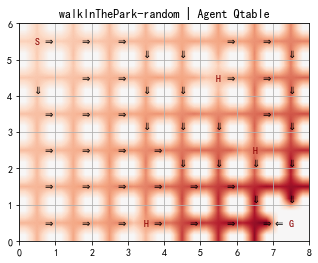

Method: random, MeanStepCnt: 143.800, MeanReward: 4.000]

------------------------------------------------------------------------------------------
EnvName = FrozenLakeEasy-v0
Set env random_seed = 1
4 4


[ epoch 999 ] |: 100%|██████████| 1000/1000 [00:02<00:00, 357.89it/s, reward=0.000]


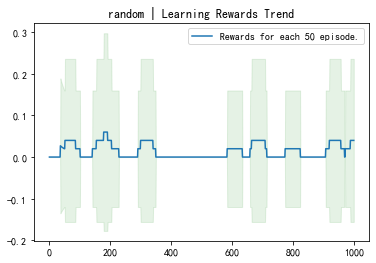

[ TOTAL-STEP: 8 ]: REWORD=0.0
[ TOTAL-STEP: 11 ]: REWORD=0.0
[ TOTAL-STEP: 18 ]: REWORD=0.0
[ TOTAL-STEP: 8 ]: REWORD=0.0
[ TOTAL-STEP: 5 ]: REWORD=0.0


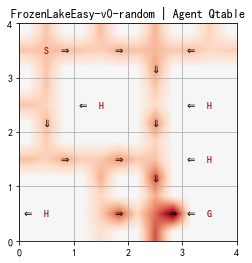

Method: random, MeanStepCnt: 10.000, MeanReward: 0.000]

In [53]:

for env_name, env in env_dict.items():
    print('--'*45)
    print(f'EnvName = {env_name}')
    final_play_res = main_train(env, env_name, policy_method_list=['random'])[0]
    final_res_print_str = f'Method: {final_play_res[0]}, MeanStepCnt: {final_play_res[1]:.3f}, MeanReward: {final_play_res[2]:.3f}]'
    final_res.append([env_name] + final_play_res)
    cs.print(final_res_print_str)

## 3.2 greedy

------------------------------------------------------------------------------------------
EnvName = theAlley
Set env random_seed = 1
1 13


[ epoch 999 ] |: 100%|██████████| 1000/1000 [00:06<00:00, 154.67it/s, reward=10.000]


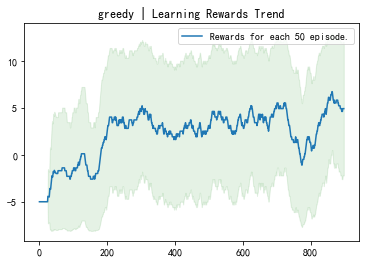

[ TOTAL-STEP: 15 ]: REWORD=10.0
[ TOTAL-STEP: 16 ]: REWORD=-5.0
[ TOTAL-STEP: 11 ]: REWORD=-5.0
[ TOTAL-STEP: 20 ]: REWORD=10.0
[ TOTAL-STEP: 5 ]: REWORD=-5.0


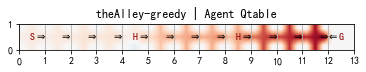

Method: greedy, MeanStepCnt: 13.400, MeanReward: 1.000]

------------------------------------------------------------------------------------------
EnvName = walkInThePark
Set env random_seed = 1
6 8


[ epoch 999 ] |: 100%|██████████| 1000/1000 [00:03<00:00, 259.23it/s, reward=10.000]


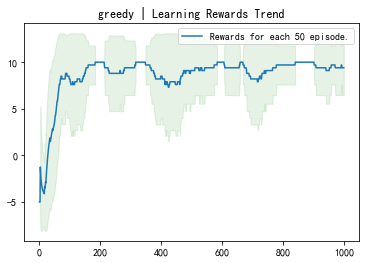

[ TOTAL-STEP: 14 ]: REWORD=10.0
[ TOTAL-STEP: 20 ]: REWORD=10.0
[ TOTAL-STEP: 18 ]: REWORD=10.0
[ TOTAL-STEP: 20 ]: REWORD=10.0
[ TOTAL-STEP: 19 ]: REWORD=10.0


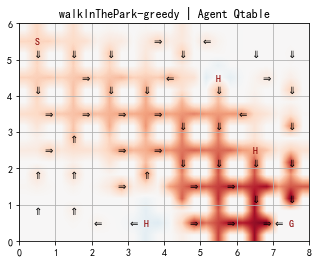

Method: greedy, MeanStepCnt: 18.200, MeanReward: 10.000]

------------------------------------------------------------------------------------------
EnvName = FrozenLakeEasy-v0
Set env random_seed = 1
4 4


[ epoch 999 ] |: 100%|██████████| 1000/1000 [00:03<00:00, 330.09it/s, reward=1.000]


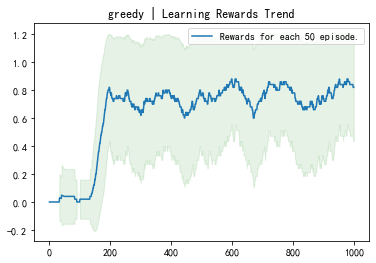

[ TOTAL-STEP: 6 ]: REWORD=1.0
[ TOTAL-STEP: 7 ]: REWORD=1.0
[ TOTAL-STEP: 4 ]: REWORD=0.0
[ TOTAL-STEP: 2 ]: REWORD=0.0
[ TOTAL-STEP: 6 ]: REWORD=1.0


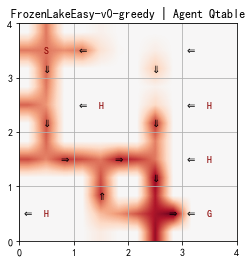

Method: greedy, MeanStepCnt: 5.000, MeanReward: 0.600]

In [54]:
for env_name, env in env_dict.items():
    print('--'*45)
    print(f'EnvName = {env_name}')
    final_play_res = main_train(env, env_name, policy_method_list=['greedy'])[0]
    final_res_print_str = f'Method: {final_play_res[0]}, MeanStepCnt: {final_play_res[1]:.3f}, MeanReward: {final_play_res[2]:.3f}]'
    final_res.append([env_name] + final_play_res)
    cs.print(final_res_print_str)

## 3.3 softmax

------------------------------------------------------------------------------------------
EnvName = theAlley
Set env random_seed = 1
1 13


[ epoch 999 ] |: 100%|██████████| 1000/1000 [00:09<00:00, 109.76it/s, reward=-5.000]


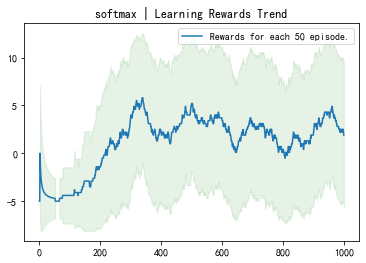

[ TOTAL-STEP: 39 ]: REWORD=10.0
[ TOTAL-STEP: 27 ]: REWORD=-5.0
[ TOTAL-STEP: 41 ]: REWORD=10.0
[ TOTAL-STEP: 13 ]: REWORD=-5.0
[ TOTAL-STEP: 104 ]: REWORD=10.0


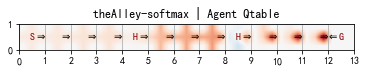

Method: softmax, MeanStepCnt: 44.800, MeanReward: 4.000]

------------------------------------------------------------------------------------------
EnvName = walkInThePark
Set env random_seed = 1
6 8


[ epoch 999 ] |: 100%|██████████| 1000/1000 [00:07<00:00, 138.54it/s, reward=10.000]


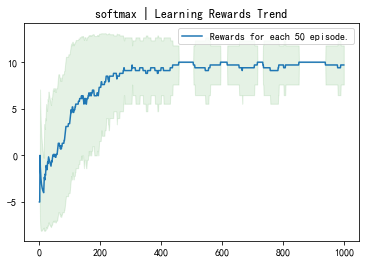

[ TOTAL-STEP: 21 ]: REWORD=10.0
[ TOTAL-STEP: 26 ]: REWORD=10.0
[ TOTAL-STEP: 36 ]: REWORD=10.0
[ TOTAL-STEP: 49 ]: REWORD=10.0
[ TOTAL-STEP: 14 ]: REWORD=10.0


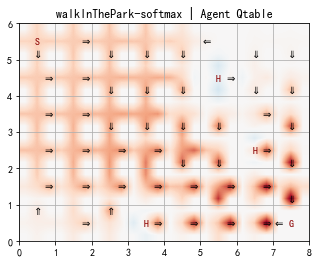

Method: softmax, MeanStepCnt: 29.200, MeanReward: 10.000]

------------------------------------------------------------------------------------------
EnvName = FrozenLakeEasy-v0
Set env random_seed = 1
4 4


[ epoch 999 ] |: 100%|██████████| 1000/1000 [00:03<00:00, 274.56it/s, reward=0.000]


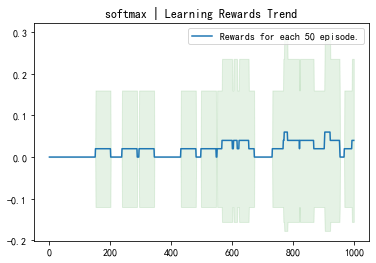

[ TOTAL-STEP: 19 ]: REWORD=0.0
[ TOTAL-STEP: 7 ]: REWORD=0.0
[ TOTAL-STEP: 6 ]: REWORD=0.0
[ TOTAL-STEP: 4 ]: REWORD=0.0
[ TOTAL-STEP: 4 ]: REWORD=0.0


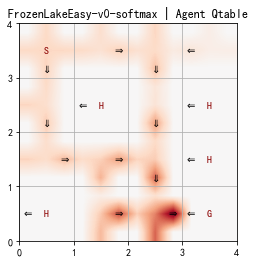

Method: softmax, MeanStepCnt: 8.000, MeanReward: 0.000]

In [55]:
for env_name, env in env_dict.items():
    print('--'*45)
    print(f'EnvName = {env_name}')
    final_play_res = main_train(env, env_name, policy_method_list=['softmax'])[0]
    final_res_print_str = f'Method: {final_play_res[0]}, MeanStepCnt: {final_play_res[1]:.3f}, MeanReward: {final_play_res[2]:.3f}]'
    final_res.append([env_name] + final_play_res)
    cs.print(final_res_print_str)

## 3.3 Thompson Sampling

这部分做了一点修改， 二项分布直接采用 当前sate的各个action的value

```python
    def _ThompsonSampling_policy(self, s: int):
        success_p = self.__softmax(self.Q[s])
        failed_p = 1 - success_p
        samples = np.random.beta(success_p, failed_p)
        return np.argmax(samples)
```


------------------------------------------------------------------------------------------
EnvName = theAlley
Set env random_seed = 1
1 13


[ epoch 999 ] |: 100%|██████████| 1000/1000 [00:08<00:00, 123.01it/s, reward=10.000]


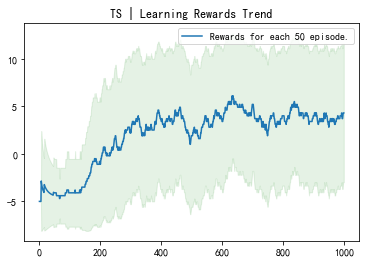

[ TOTAL-STEP: 43 ]: REWORD=-5.0
[ TOTAL-STEP: 12 ]: REWORD=-5.0
[ TOTAL-STEP: 33 ]: REWORD=10.0
[ TOTAL-STEP: 98 ]: REWORD=10.0
[ TOTAL-STEP: 24 ]: REWORD=10.0


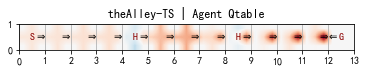

Method: TS, MeanStepCnt: 42.000, MeanReward: 4.000]

------------------------------------------------------------------------------------------
EnvName = walkInThePark
Set env random_seed = 1
6 8


[ epoch 999 ] |: 100%|██████████| 1000/1000 [00:06<00:00, 146.87it/s, reward=10.000]


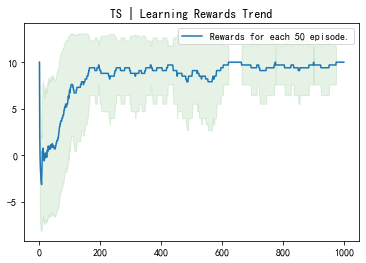

[ TOTAL-STEP: 22 ]: REWORD=10.0
[ TOTAL-STEP: 39 ]: REWORD=10.0
[ TOTAL-STEP: 23 ]: REWORD=10.0
[ TOTAL-STEP: 23 ]: REWORD=10.0
[ TOTAL-STEP: 24 ]: REWORD=10.0


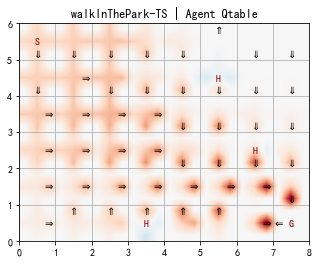

Method: TS, MeanStepCnt: 26.200, MeanReward: 10.000]

------------------------------------------------------------------------------------------
EnvName = FrozenLakeEasy-v0
Set env random_seed = 1
4 4


[ epoch 999 ] |: 100%|██████████| 1000/1000 [00:04<00:00, 236.25it/s, reward=1.000]


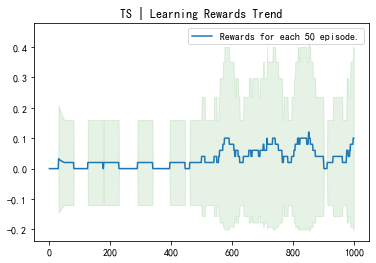

[ TOTAL-STEP: 3 ]: REWORD=0.0
[ TOTAL-STEP: 6 ]: REWORD=0.0
[ TOTAL-STEP: 7 ]: REWORD=0.0
[ TOTAL-STEP: 7 ]: REWORD=0.0
[ TOTAL-STEP: 15 ]: REWORD=0.0


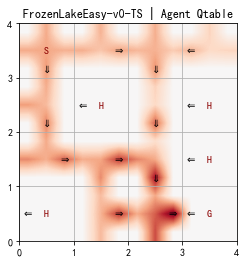

Method: TS, MeanStepCnt: 7.600, MeanReward: 0.000]

In [56]:
for env_name, env in env_dict.items():
    print('--'*45)
    print(f'EnvName = {env_name}')
    final_play_res = main_train(env, env_name, policy_method_list=['TS'])[0]
    final_res_print_str = f'Method: {final_play_res[0]}, MeanStepCnt: {final_play_res[1]:.3f}, MeanReward: {final_play_res[2]:.3f}]'
    final_res.append([env_name] + final_play_res)
    cs.print(final_res_print_str)

## 3.4 UCB

ucb其实可以理解为：权衡-累计到目前的状态下的action收益 和 action的不确定性 
- 更多的探索没有尝试过的action

所以做了一点修改，只有当用初始策略`Greedy` 探索了所有state之后才开始UCB

```python
b_t = self.__softmax(self.Q[s]) + self.__softmax(np.sqrt(2 * np.log(self.ucb_cnt) / self.ucb_sa_visit_cnt_arr[s]))
a_final = np.argmax(b_t)
```

------------------------------------------------------------------------------------------
EnvName = theAlley
Set env random_seed = 1
1 13


[ epoch 13 ] |:   2%|▎         | 25/1000 [00:00<00:08, 114.03it/s, reward=-5.000]

UCB-Start 21


[ epoch 999 ] |: 100%|██████████| 1000/1000 [00:54<00:00, 18.36it/s, reward=-0.000]


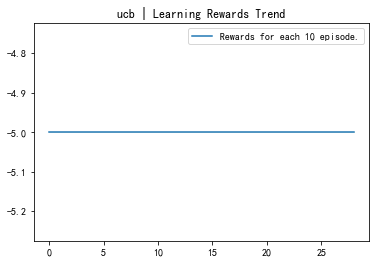

[ TOTAL-STEP OVER 500 ]
[ TOTAL-STEP: 501 ]: REWORD=0.0
[ TOTAL-STEP OVER 500 ]
[ TOTAL-STEP: 501 ]: REWORD=0.0
[ TOTAL-STEP OVER 500 ]
[ TOTAL-STEP: 501 ]: REWORD=0.0
[ TOTAL-STEP OVER 500 ]
[ TOTAL-STEP: 501 ]: REWORD=0.0
[ TOTAL-STEP OVER 500 ]
[ TOTAL-STEP: 501 ]: REWORD=0.0


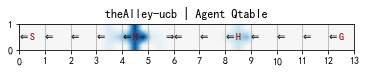

Method: ucb, MeanStepCnt: 501.000, MeanReward: 0.000]

------------------------------------------------------------------------------------------
EnvName = walkInThePark
Set env random_seed = 1
6 8


[ epoch 9 ] |:   1%|▏         | 14/1000 [00:00<00:23, 42.30it/s, reward=-5.000]

UCB-Start 74


[ epoch 999 ] |: 100%|██████████| 1000/1000 [00:06<00:00, 164.59it/s, reward=10.000]


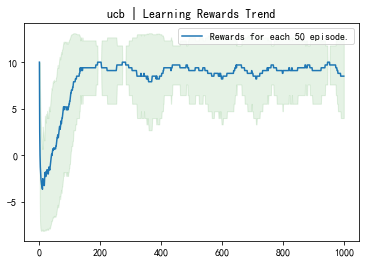

[ TOTAL-STEP: 18 ]: REWORD=10.0
[ TOTAL-STEP: 14 ]: REWORD=10.0
[ TOTAL-STEP: 12 ]: REWORD=10.0
[ TOTAL-STEP: 14 ]: REWORD=10.0
[ TOTAL-STEP: 20 ]: REWORD=10.0


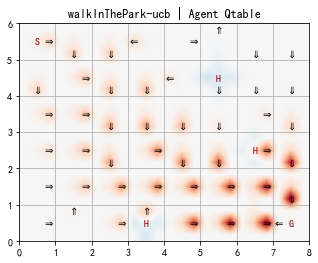

Method: ucb, MeanStepCnt: 15.600, MeanReward: 10.000]

------------------------------------------------------------------------------------------
EnvName = FrozenLakeEasy-v0
Set env random_seed = 1
4 4


[ epoch 50 ] |:   8%|▊         | 80/1000 [00:00<00:03, 296.35it/s, reward=0.000]

UCB-Start 71


[ epoch 999 ] |: 100%|██████████| 1000/1000 [00:03<00:00, 269.87it/s, reward=1.000]


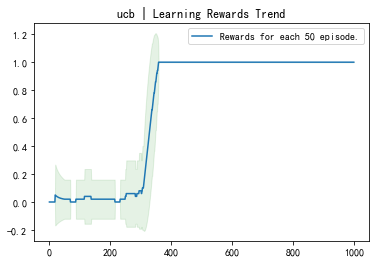

[ TOTAL-STEP: 6 ]: REWORD=1.0
[ TOTAL-STEP: 6 ]: REWORD=1.0
[ TOTAL-STEP: 6 ]: REWORD=1.0
[ TOTAL-STEP: 6 ]: REWORD=1.0
[ TOTAL-STEP: 6 ]: REWORD=1.0


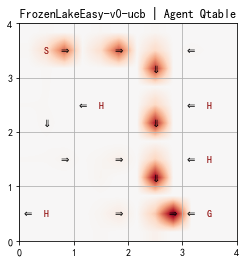

Method: ucb, MeanStepCnt: 6.000, MeanReward: 1.000]

In [57]:
for env_name, env in env_dict.items():
    print('--'*45)
    print(f'EnvName = {env_name}')
    final_play_res = main_train(env, env_name, policy_method_list=['ucb'])[0]
    final_res_print_str = f'Method: {final_play_res[0]}, MeanStepCnt: {final_play_res[1]:.3f}, MeanReward: {final_play_res[2]:.3f}]'
    final_res.append([env_name] + final_play_res)
    cs.print(final_res_print_str)

# 四、Summary

In [58]:
import pandas as pd

pd.DataFrame(final_res, columns=['envName', 'policy', 'stepCount', 'Rewards']).sort_values(by='envName')

,envName,policy,stepCount,Rewards
2,FrozenLakeEasy-v0,random,10.0,0.0
5,FrozenLakeEasy-v0,greedy,5.0,0.6
8,FrozenLakeEasy-v0,softmax,8.0,0.0
11,FrozenLakeEasy-v0,TS,7.6,0.0
14,FrozenLakeEasy-v0,ucb,6.0,1.0
0,theAlley,random,57.8,-5.0
3,theAlley,greedy,13.4,1.0
6,theAlley,softmax,44.8,4.0
9,theAlley,TS,42.0,4.0
12,theAlley,ucb,501.0,0.0
